# Reinforcement learning

"Reinforcement learning (RL) is een vorm van machine learning waarbij computers leren om de beste beslissingen te nemen door interactie met hun omgeving. In plaats van duidelijke instructies te krijgen, leert de computer door te proberen en te ervaren (door de omgeving te verkennen en beloningen of straffen te ontvangen voor zijn acties)."
https://www.scribbr.nl/ai-tools-gebruiken/reinforcement-learning-uitgelegd/

![sklearn](RLAI.png)

Bijvoorbeeld met een auto is de auto de agent, de omgeving waar de auto rijdt de enviroment. De envviroment geeft de state aan de agent, dit kan de conditie van de weg zijn of de locatie van de auto en andere auto's. De agent heeft acties die hij onderneemt zoals voor- en achteruit rijden, links of rechts afslaan. De agent zzal reward signalen ontvangen zolang het dichterbij zijn bestemming komt. De agent gebruikt deze reward signalen om te begrijpen welke acties een succes waren en welke niet. Je geeft de agent bijvoorbeeld tekens een punt wanneer hij dichterbij de eindbestemming komt. En er kunnen punten worden afgetrokken worden als er bijvoorbeeld verkeersovertredingen plaats vinden. 

bron: https://www.youtube.com/watch?v=RAUmWPpxa2M

Credit: https://prutor.ai/reinforcement-learning-algorithm-python-implementation-using-q-learning/ met dank aan Lotte Lampe

In deze code wordt laten zien hoe je een eenvoudig Reinforcement Learning-algoritme kunt implementeren, dat de Q-Learning-techniek wordt genoemd. In deze code proberen we een robot te leren om zijn bestemming te bereiken met behulp van de Q-Learning-techniek.

Q-learning is een modelvrij reinforcement learning algoritme dat wordt gebruikt om een agent te trainen om beslissingen te nemen in een omgeving om tot een optimale actiestrategie te komen. Het algoritme maakt gebruik van een Q-functie (Quality-functie) of Q-waarden om de verwachte beloning van het uitvoeren van een bepaalde actie in een bepaalde toestand te schatten.

De Q-functie wordt bijgewerkt op basis van de beloningen die de agent ontvangt bij het uitvoeren van acties in bepaalde toestanden. Het doel is om de Q-functie zodanig aan te passen dat de agent uiteindelijk de optimale actiestrategie leert die leidt tot de maximale cumulatieve beloning over de tijd.

In [1]:
import numpy as np
import pylab as pl
import networkx as nx
import matplotlib.pyplot as plt


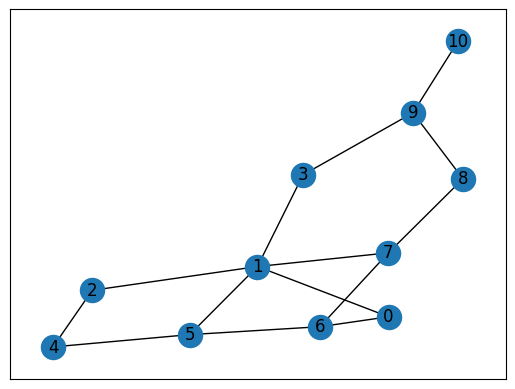

In [2]:
# lijst edges wordt aangemaakt
# verbindingen tussen knooppunten in de grafiek
# elk paar (a, b) in edges betekent een directe verbinding van knooppunt a naar knooppunt b
edges = [(0, 1), (1, 5), (5, 6), (5, 4), (1, 2),
(1, 3), (9, 10), (2, 4), (0, 6), (6, 7),
(8, 9), (7, 8), (1, 7), (3, 9)]

# het doel knooppunt wordt gedeffieneerd 
# hier willen we heen navigeren --> we willen de optimale route vinden
goal = 10

G = nx.Graph()
# verbindingen uit de lijst edges worden aan de grafiek toegevoegd
G.add_edges_from(edges)
pos = nx.spring_layout(G) # positioneren van knooppunten
# Deze lijnen tekenen respectievelijk de knooppunten, de randen en de labels (knooppuntnummers) van de grafiek op basis van de berekende posities
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
pl.show()

Het doel is om een Q-matrix te trainen die de optimale route naar het doelknooppunt kan bepalen op basis van deze beloningen

In [3]:
# deze code past de beloningsmatrix aan op basis van de grafiekstructuur en het doelknooppunt
# grootte van beloning
# overgangen naar en van het doelknooppunt krijgen een beloning van 100
# andere overgangen krijgen een beloning van 0
MATRIX_SIZE = 11
M = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
M *= -1

for point in edges:
    print(point)
    if point[1] == goal:
        M[point] = 100
    else:
        M[point] = 0

    if point[0] == goal:
        M[point[::-1]] = 100
    else:
        M[point[::-1]] = 0
    

M[goal, goal] = 100
print(M)


(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(1, 3)
(9, 10)
(2, 4)
(0, 6)
(6, 7)
(8, 9)
(7, 8)
(1, 7)
(3, 9)
[[ -1.   0.  -1.  -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.]
 [  0.  -1.   0.   0.  -1.   0.  -1.   0.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.  -1.   0.  -1.]
 [ -1.  -1.   0.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0.  -1.   0.  -1.  -1.  -1.  -1.]
 [  0.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.]
 [ -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.   0.  -1. 100.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.   0. 100.]]


wat zien we: de beloningsmatrix (M) na de aanpassingen op basis van de gegeven grafiekstructuur en het doelknooppunt
0: Het getal 0 in de matrix geeft aan dat er geen beloning is voor een overgang van het ene knooppunt naar het andere. Dit wordt vaak gebruikt voor overgangen die niet gunstig zijn of waarvoor geen specifieke beloning is gedefinieerd.

-1: Het getal -1 wordt gebruikt om aan te geven dat de overgang van het ene knooppunt naar het andere wordt ontmoedigd of gestraft. In veel Q-learning scenario's wordt -1 gebruikt als een negatieve beloning om aan te geven dat de agent wordt aangemoedigd om alternatieve routes te verkennen.

In [4]:
Q = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))

gamma = 0.75 # mate van belangrijkheid van toekomstige beloningen
# learning parameter
initial_state = 1 # het begin

# alleen acties geretourneerd waarvoor de waarde in de beloningsmatrix M niet negatief is
def available_actions(state):
    current_state_row = M[state, ]
    available_action = np.where(current_state_row >= 0)[1]
    return available_action

available_action = available_actions(initial_state)

# willekeurig een actie uit de lijst van beschikbare acties in een bepaalde staat
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_action, 1))
    return next_action

action = sample_next_action(available_action)

# Deze functie voert een update uit op de Q-matrix op basis van de beloning (M)
def update(current_state, action, gamma):
    max_index = np.where(Q[action, :] == np.max(Q[action, :]))[1]
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size=1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]
    Q[current_state, action] = M[current_state, action] + gamma * max_value
    if np.max(Q) > 0:
        return np.sum(Q / np.max(Q) * 100)
    else:
        return 0


C:\Users\Ed\AppData\Local\Temp\ipykernel_11400\1405112934.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_action = int(np.random.choice(available_action, 1))


In het algemeen wordt dit proces herhaald gedurende meerdere iteraties, waarbij de agent acties uitprobeert, de Q-matrix bijwerkt en leert van de interactie met de omgeving. De uiteindelijke Q-matrix zou moeten convergeren naar optimale Q-waarden voor elke staat-actie combinatie, waardoor de agent in staat is om de meest gunstige acties te kiezen om zijn doel te bereiken.

Most efficient path:
[0, 1, 3, 9, 10]


C:\Users\Ed\AppData\Local\Temp\ipykernel_11400\1405112934.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_action = int(np.random.choice(available_action, 1))
C:\Users\Ed\AppData\Local\Temp\ipykernel_11400\1405112934.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index = int(np.random.choice(max_index, size=1))
C:\Users\Ed\AppData\Local\Temp\ipykernel_11400\1405112934.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index = int(max_index)

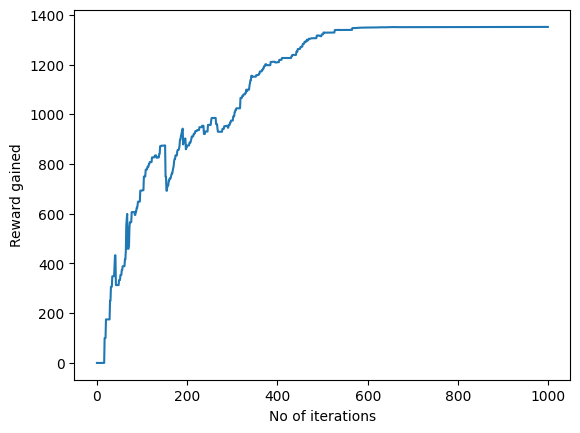

In [5]:
# Deze code voert een evaluatie en visualisatie van het getrainde Q-learning algoritme uit

scores = []
# algoritme geëvalueerd door willekeurige staten te kiezen, een actie uit te voeren, de Q-matrix bij te werken en de verkregen score op te slaan
for i in range(1000): # 1000 itteraties
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_action = available_actions(current_state)
    action = sample_next_action(available_action)
    score = update(current_state, action, gamma)
    scores.append(score)

# Testen
    # hier wordt vanaf 0 genavigeerd door de meest waarscheinlijke paden
current_state = 0
steps = [current_state]

while current_state != 10:
    next_step_index = np.where(Q[current_state, :] == np.max(Q[current_state, :]))[1]
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size=1))
    else:
        next_step_index = int(next_step_index)
    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)

# Plotting the scores
pl.plot(scores)
pl.xlabel('No of iterations')
pl.ylabel('Reward gained')
pl.show()


Conclusie: Deze code genereert een plot van de behaalde beloningen gedurende de 1000 iteraties. De x-as vertegenwoordigt het aantal iteraties, en de y-as vertegenwoordigt de behaalde beloning bij elke iteratie. De plot geeft een visuele weergave van hoe goed het algoritme presteert over de tijd.